<img title="Heart" alt="Alt text" src="https://apollohealthlib.blob.core.windows.net/health-library/2019/06/Heart-Attack-signs.jpg">


# Introduction

The data used is an Heart Disease dataset consisting of patients informations relating to whether they have heart diesel or not denoted as 1 and 0 respectively. Below are features used to determine the disease status of a patient

- age: age in years
- sex: (1 = male; 0 = female)
- cp: chest pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- restecg: resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak:  ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
    - Value 1: upsloping
    - Value 2: flat
    - Value 3: downsloping
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

For more information click [here](https://archive.ics.uci.edu/ml/datasets/heart+Disease)

# Questions

- What are the target variables
- Does Age have an effect on having heart disease?
- Which gender have more heart disease?
- What roles does the features play in determining the chance of having heart disease?

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, f1_score
from sklearn.model_selection import StratifiedKFold, KFold, train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
%matplotlib inline

# Loading the data set

In [3]:
df = pd.read_csv('{file path}/datasets/heart.csv')

In [4]:
df.head() # top 5 records in the dataset

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [5]:
df.sample()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
31   65    1   0       120   177    0        1      140      0      0.4   

    slope  ca  thal  target  
31      2   0     3       1

In [6]:
# the shape of the dataset
df.shape

(303, 14)

The dataset consist of 303 patient records each having 14 features as seen below

In [7]:
result = ', '.join(feature for feature in df.columns.tolist()) # to split each features with commas

print('Features:',result)

Features: age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target


# Statistical Distribution

In [8]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

Mean Age is 54, Minimum age is 29, Maximum age is 77

# Data Wrangling

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
features = df.columns.tolist()

for feature in features:
    print(feature,':', df[feature].nunique()) # check the unique values for each features

age : 41
sex : 2
cp : 4
trestbps : 49
chol : 152
fbs : 2
restecg : 3
thalach : 91
exang : 2
oldpeak : 40
slope : 3
ca : 5
thal : 4
target : 2


In [11]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There are no empty data and all data types corresponds to each features, the dataset is of good quality and tidy.
So next is Exploratory Data Analysis.

# Exploratory Data Analysis

### What are the target variables?

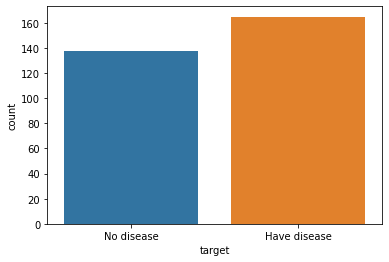

In [12]:
sns.countplot(x='target', data=df);
plt.xticks(sorted(df['target'].value_counts().index),['No disease', 'Have disease'],
           rotation=360); # to change the xtick from 0 and 1 to no disease and have disease

The dataset is classification problem having a distinct variable (0 and 1), which is denoted as no disease and have disease respectively. Patient that have heart disease are more than does that those have.

# Which gender have more heart disease?

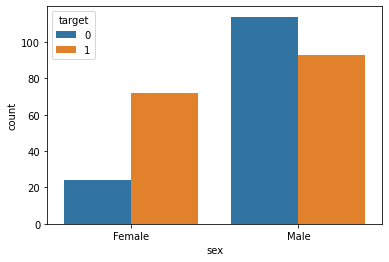

In [16]:
sns.countplot(x='sex', data=df, hue='target');
plt.xticks(sorted(df['sex'].value_counts().index),['Female', 'Male']
           ,rotation=360); # to change 0 and 1 to female to male respectively

The rate of male having and not  having heart disease is more compared to female

# What are the correlation between each features

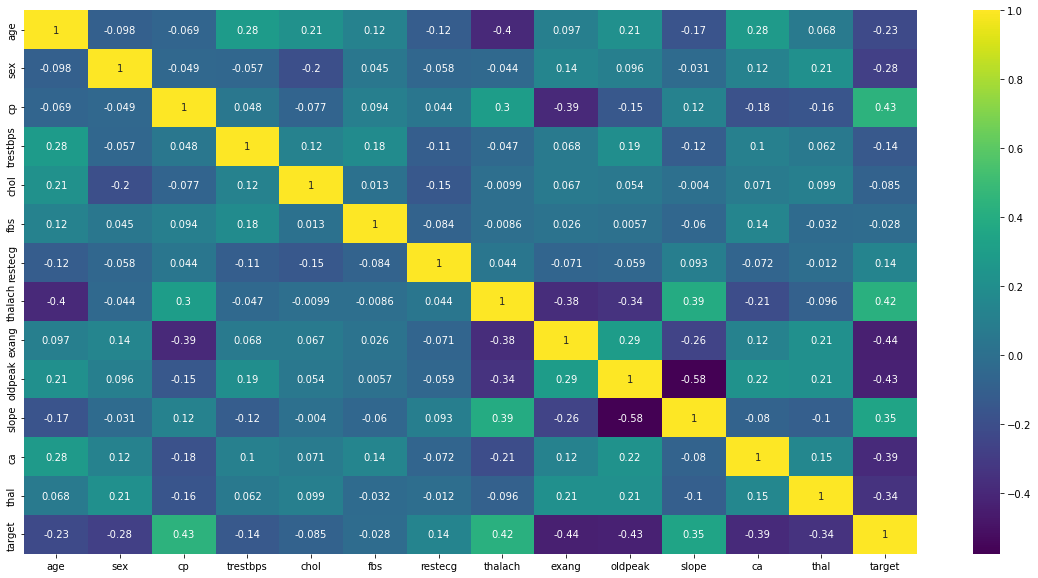

In [68]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap = 'viridis');

# Does Age have an effect on having heart disease?

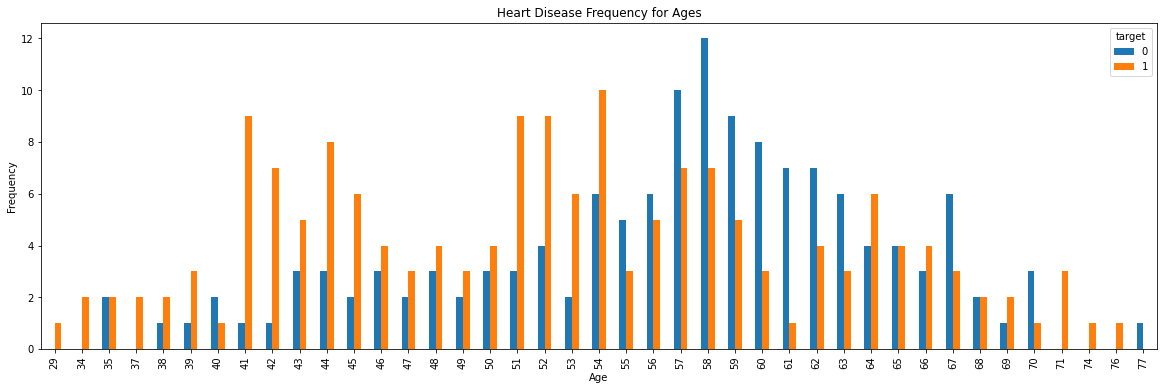

In [69]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# What roles does the features play in determining the chance of having heart disease?

## Chest pain

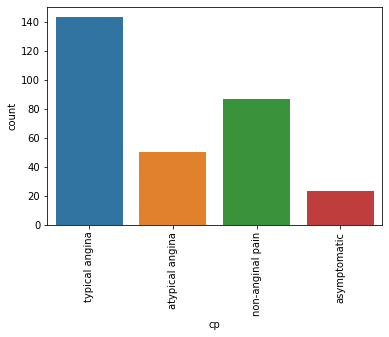

In [70]:
sns.countplot(x=df.cp);
plt.xticks(sorted(df.cp.unique().tolist()),['typical angina', 'atypical angina','non-anginal pain','asymptomatic']
           ,rotation=90);

Most patient has typical angina chest pain i.e the discomfort that is noted when the heart does not get enough blood or oxygen.

# What is the Relationship between Chest pain and heart disease?

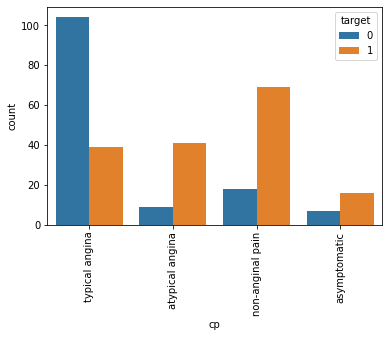

In [71]:
sns.countplot(x=df.cp, hue=df.target);
plt.xticks(sorted(df.cp.unique().tolist()),['typical angina', 'atypical angina','non-anginal pain','asymptomatic']
           ,rotation=90);

# What is the relationship between serum cholestoral, maximum heart rate achieved and heart disease?

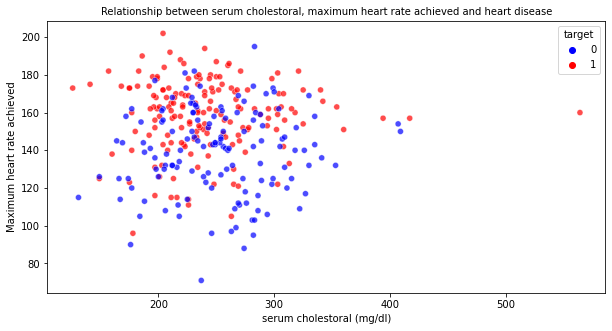

In [72]:

plt.figure(figsize=(10,5))
sns.scatterplot(x=df.chol, y=df.thalach, hue=df.target, palette=['blue','red'], alpha=.7);
plt.xlabel('serum cholestoral (mg/dl)');
plt.ylabel('Maximum heart rate achieved');
#plt.legend(['No diesel','Have diesel'])
plt.title('Relationship between serum cholestoral, maximum heart rate achieved and heart disease',size=10);

- The higher the serum cholestoral, the higher the maximum heart rate.
- Patients that have heart diesel are more compared to those without heart disease

# What is relationship between blood sugar, maximum heart rate and serum cholestoral

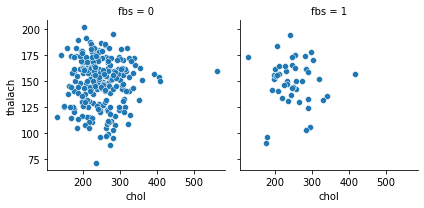

In [73]:
g = sns.FacetGrid(data = df, col = 'fbs', height = 3,
                margin_titles = True)
g.map(sns.scatterplot, 'chol', 'thalach');

Fasting blood sugar > 120 mg/dl patient seems to have lower maximum heart rate and serum cholestoral

# Modeling

In [74]:
X = df.drop('target', axis=1)
y = df.target

In [75]:
std = StandardScaler()

X_scaled = std.fit_transform(X)

In [76]:
#X_scaled

In [77]:
#train_test_splitting of the dataset

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.30,random_state=0)

### Logistic Regression

- [Area Under ROC score](https://towardsdatascience.com/interpreting-roc-curve-and-roc-auc-for-classification-evaluation-28ec3983f077) (roc_auc_score) of above 0.5 is acceptable.
- [ROC Curve](https://towardsdatascience.com/interpreting-roc-curve-and-roc-auc-for-classification-evaluation-28ec3983f077)  closer to the axes and the “elbow” close to the coordinate (0,1) show the model a good classifier.

In [106]:
log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train,y_train) #fit model to the dataset
y_pred_lr = log_reg.predict_proba(X_test) #to predict

In [107]:
# to test the performance of our model
print('ROC Score:{:.4f}'.format(roc_auc_score(y_test,y_pred_lr[:,1])))

ROC Score:0.8854


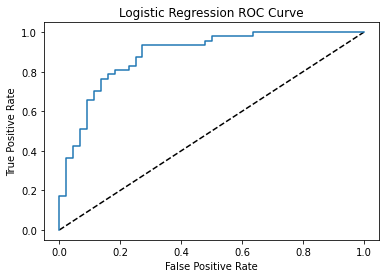

In [110]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr[:,1])

# plot curve
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr, tpr, label = "Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.show()

### Support Vector Machine

In [108]:
svm= SVC(random_state=0,probability=True)
svm.fit(X_train,y_train) #fit model to the dataset
y_pred_svc = svm.predict_proba(X_test) #to predict

In [109]:
# to test the performance of our model
print('ROC Score:{:.4f}'.format(roc_auc_score(y_test,y_pred_svc[:,1])))

ROC Score:0.9284


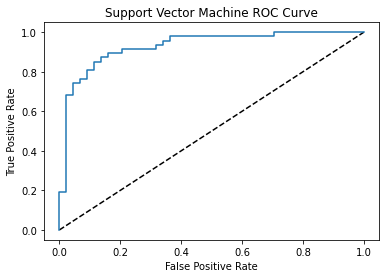

In [111]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svc[:,1])

# plot curve
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr, tpr, label = "Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Support Vector Machine ROC Curve")
plt.show()

Support Vector Machine is the best having a high roc_auc_score and a better roc_curve